<a href="https://colab.research.google.com/github/chinguyen19/Sales-Analysis/blob/main/Sales_analysis(Regional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USA Regional Sales Analysis**
## Project Summary
The project uses Acme Co.’s 2014–2018 USA sales dataset to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk

## **1. Set up**


In [1]:
# 1.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 1.2 Load data
sheets = pd.read_excel('/content/sample_data/Regional Sales Dataset.xlsx', sheet_name=None)
# 1.3 Assign to named DataFrames
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

## **2. Data profilling (Inital inspection)**

In [7]:
# 2.1 Check df's dim
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (48, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [4]:
# 2.2 QUICK VIEW OF ALL RAW DATAFRAMES
# -----------------------------------------
# Print first few rows for each sheet

print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())


— df_sales head —


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




— df_customers head —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products head —


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_reg head —


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets head —


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


### **ERROR LOG**
- first row of df_state_reg contains the real column names (***solved***)

In [5]:
# 2.3 fix the header of df_state_reg
new_header        = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg       = df_state_reg[1:].reset_index(drop=True)

In [6]:
# 2.4 Checking duplicate values
len(df_sales) == len(df_sales.drop_duplicates())

True

--> No duplicated orders

## **3. Data cleaning & wrangling**

In [8]:
# 3.1 Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# 3.2 Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# 3.3 Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# 3.4 Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# 3.5 Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# 3.6 Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [9]:
# 3.7 Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

# Display the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [10]:
# 4.x DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# ------------------------------------------------------------------

# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]

# 2) Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

# Display the cleaned DataFrame structure
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [11]:
# 4.3 Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [12]:
# Check for missing values in each column of the dataset
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
cost,0
state,0


## **5. Feature engineering**

In [13]:
# 5.1 Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 5.2 Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 5.3 Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 5.4 Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5.5 Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1


### **6. EDA + Descriptive analysis**

### **1. Monthly Sales Trend Over Time**
Goal: Track revenue trends over time to detect seasonality or sales spikes

In [ ]:
# Convert order_date to monthly period
df['order_date'] = df['order_date'].dt.to_period('M')
# Calculate total revenue for each month
monthly_revenue = df.groupby('order_date')['revenue'].sum()

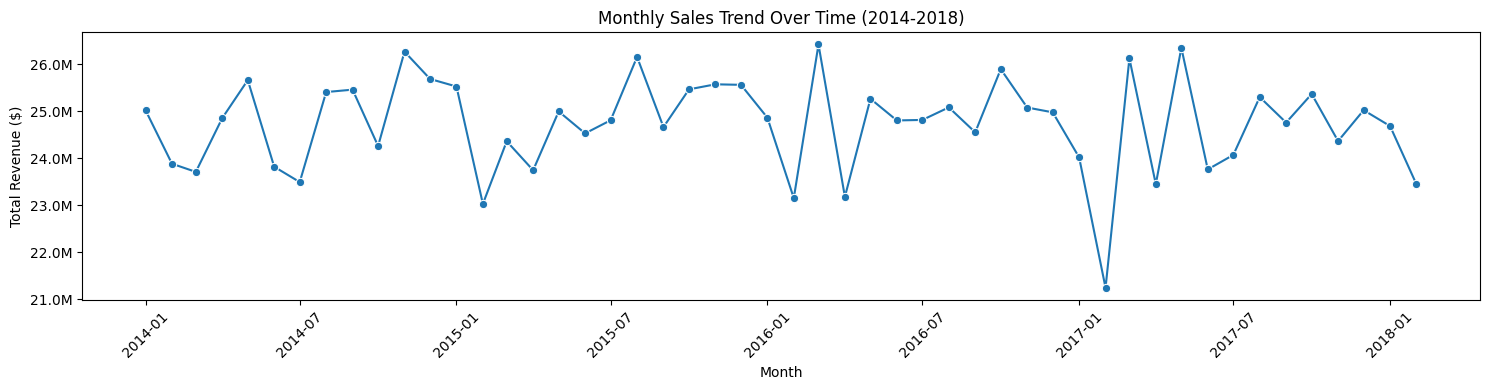

In [21]:
plt.figure(figsize=(15,4))
sns.lineplot(x=monthly_revenue.index.to_timestamp(), y=monthly_revenue.values, marker='o')

# Scale y-axis to Millions
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend Over Time (2014-2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **INSIGHTS**:
*   A common cycle of sales is bewteen 24M and 26M dollars, with clear *peaks in late sring and early summer* (May-June) and *troughs each Jan*
*   The sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions

## **2. Monthly Sales Trend (All Years Combined)**
Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month